Task-1

In [17]:
# %pip install --upgrade --force-reinstall regex
# %pip install --upgrade --force-reinstall nltk textblob
# %pip uninstall textblob
# %pip install scikit-learn

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textblob as tb
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath("../scripts"))

In [3]:
os.chdir('..')  # Go up a directory
# print(os.getcwd())

○	Descriptive Statistics

■	Obtain basic statistics for textual lengths (like headline length).

In [10]:
from sentiment import load_data, headline_length_stats, count_articles_per_publisher, publication_trend
# Load your data safely
try:
    news_df = load_data('Data/raw_analyst_ratings.csv')
except Exception as e:
    print(f"Error loading CSV: {e}")
    news_df = None

if news_df is not None:
    # Obtain basic statistics for textual lengths   
    print("Headline Length Stats:",)
    print('=======================\n',headline_length_stats(news_df))

Headline Length Stats:
 count    55987.000000
mean        80.015254
std         56.126094
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64


■	Count the number of articles per publisher to identify which publishers are most active.

In [11]:
    # Count Articles per Publisher
print("Articles per Publisher:",)
print("===================\n", count_articles_per_publisher(news_df), "\n")

Articles per Publisher:
 publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
                     ...  
Jennifer Lynn            1
Tatro Capital            1
webmaster                1
Thomas Stein             1
Usman Rafi               1
Name: count, Length: 225, dtype: int64 



■	Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

In [12]:

    # Analyze the publication dates to see trends over time
print("Publication Trend (daily:")
print("===========================", publication_trend(news_df, freq='D'))

Publication Trend (daily:
=========================== date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: article_count, Length: 2528, dtype: int64


○	Text Analysis(Topic Modeling):

■	Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).

In [13]:
from sentiment import preprocess_text, extract_topics
# Load the dataset
try:
    news_df = load_data('Data/raw_analyst_ratings.csv')
except Exception as e:
    print(f"Error loading dataset: {e}")
    news_df = None

# Process and extract topics
if news_df is not None:
    clean_df = preprocess_text(news_df, text_col='headline')
    if clean_df is not None:
        topics = extract_topics(clean_df, text_col='headline', num_topics=5, num_words=7)
        if topics:
            print("\n🔍 Discovered Topics:")
            for topic in topics:
                print(topic)


🔍 Discovered Topics:
Topic 1: price, target, maintains, raises, lowers, buy, downgrades
Topic 2: stocks, session, moving, new, week, set, low
Topic 3: week, stocks, hit, trading, shares, companies, lows
Topic 4: shares, update, market, earnings, announces, reports, share
Topic 5: eps, sales, estimate, vs, yoy, biggest, movers


○	Time Series Analysis

■	How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?

■	Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.

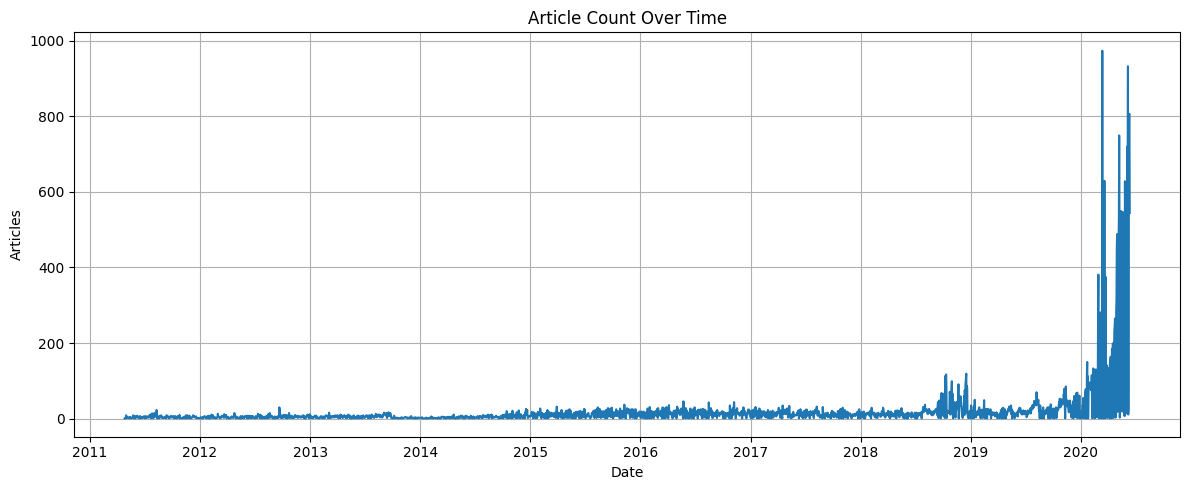

Error in publishing time analysis: unsupported operand type(s) for +: 'DatetimeArray' and 'str'
Daily Article Counts:
 date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64

Articles by Day of Week:
 day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


In [4]:
from sentiment import analyze_publication_frequency, analyze_publishing_time, daily_article_counts, day_of_week_analysis
# Load your dataset
news_df = load_data('Data/raw_analyst_ratings.csv')

if news_df is not None:
    # Analyze publication frequency
    daily_freq = analyze_publication_frequency(news_df)

    # Analyze publishing time
    hourly_freq = analyze_publishing_time(news_df)


if news_df is not None:
    print("Daily Article Counts:\n", daily_article_counts(news_df))
    print("\nArticles by Day of Week:\n", day_of_week_analysis(news_df))

○	Publisher Analysis

■	Which publishers contribute most to the news feed? Is there a difference in the type of news they report?

In [15]:
from sentiment import top_publishers, extract_email_domains
# Load the dataset
news_df = load_data('Data/raw_analyst_ratings.csv')

if news_df is not None:
    # Get top publishers
    print("Top Publishers:\n", top_publishers(news_df))

Top Publishers:
 publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


■	If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

In [17]:
   # Get email domains (if used)
print("Top Email Domains")
print("=================:\n", extract_email_domains(news_df))

Top Email Domains
=================:
 benzinga.com    1196
gmail.com          3
dtype: int64
